# Price Analysis Of HBAR  for 1 Year (Feb 2022 To Feb 2023).
- Data obtained from [Yahoo Finance]('https://finance.yahoo.com/quote/HBAR-USD/history/')

Index:

- [Exploring and Inspecting the data](#Exploring-and-Inspecting-the-data)
- [Visual Exploratory Data Analysis](#Visual-Exploratory-Data-Analysis)
- [ATR of HBAR for last 1 year](#ATR-of-HBAR-for-last-1-year)
- [Conclusion](#Conclusion)

In [15]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as pdr
import datetime as dt
import seaborn as sns
%matplotlib inline

In [2]:
# reading the file
df = pd.read_csv('HBAR-USD.csv')

### Exploring and Inspecting the data

In [4]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-02-02,0.229303,0.233883,0.220719,0.221350,0.221350,51502562
1,2022-02-03,0.221148,0.246020,0.215663,0.236876,0.236876,168730764
2,2022-02-04,0.236844,0.248447,0.235951,0.248163,0.248163,114956380
3,2022-02-05,0.248210,0.262426,0.247815,0.258825,0.258825,84933219
4,2022-02-06,0.258723,0.260937,0.250869,0.258038,0.258038,61045797


In [5]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
361,2023-01-29,0.066837,0.070539,0.066609,0.069415,0.069415,29140595
362,2023-01-30,0.069441,0.069919,0.063058,0.064103,0.064103,37615144
363,2023-01-31,0.064104,0.066562,0.064069,0.064577,0.064577,32604175
364,2023-02-01,0.064571,0.070270,0.062493,0.069702,0.069702,54761796
365,2023-02-02,0.069593,0.069896,0.068510,0.069214,0.069214,58755300


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       366 non-null    object 
 1   Open       366 non-null    float64
 2   High       366 non-null    float64
 3   Low        366 non-null    float64
 4   Close      366 non-null    float64
 5   Adj Close  366 non-null    float64
 6   Volume     366 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 20.1+ KB


In [7]:
df.describe().T[['min', 'max', 'mean']]


,min,max,mean
Open,3.643000e-02,2.619440e-01,1.028440e-01
High,3.756100e-02,2.689260e-01,1.060165e-01
Low,3.578800e-02,2.528110e-01,9.920367e-02
Close,3.642900e-02,2.618580e-01,1.024059e-01
Adj Close,3.642900e-02,2.618580e-01,1.024059e-01
Volume,7.904994e+06,2.708434e+08,4.999534e+07


for last one year
- Average opening price is $ 0.1028

- Average closing price is $ 0.1024 
- Average volume traded was 49995340

In [8]:
def split_date(df):
    df['Date'] = pd.to_datetime(df['Date'])
    df['month'] = df.Date.dt.month


In [9]:
split_date(df)

### Visual Exploratory Data Analysis

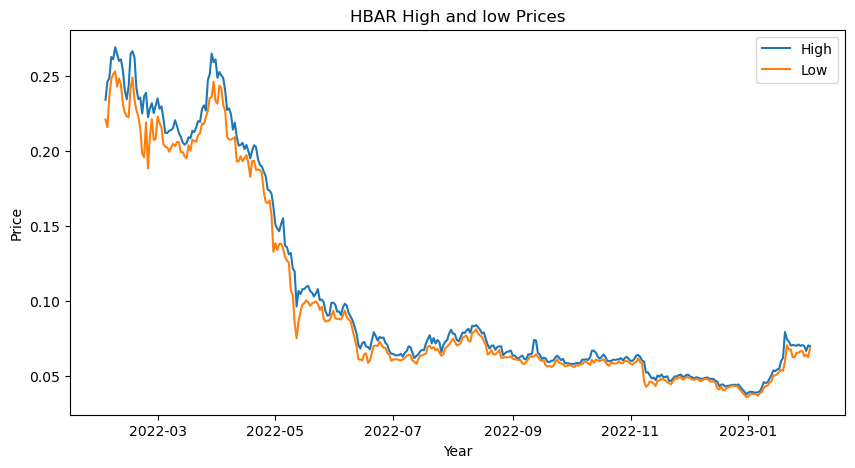

In [10]:
plt.figure(figsize=(10,5)) 
plt.plot(df['Date'], df['High'], label='High')
plt.plot(df['Date'], df['Low'], label='Low')
plt.legend()
plt.title("HBAR High and low Prices")
plt.xlabel("Year")
plt.ylabel("Price")
plt.show()

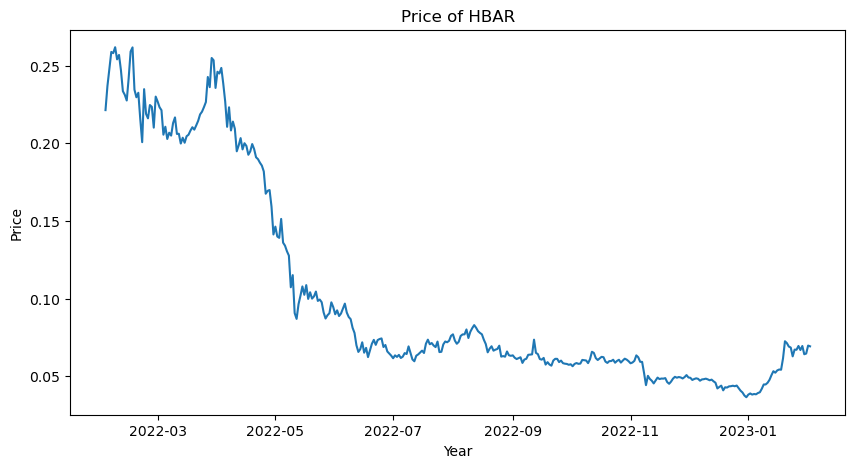

In [11]:
plt.figure(figsize=(10,5)) 
plt.plot(df['Date'], df['Close'])
plt.title("Price of HBAR")
plt.xlabel("Year")
plt.ylabel("Price")
plt.show()

In [25]:
df['month'].value_counts()

3     31
5     31
7     31
8     31
10    31
12    31
1     31
4     30
6     30
9     30
11    30
2     29
Name: month, dtype: int64

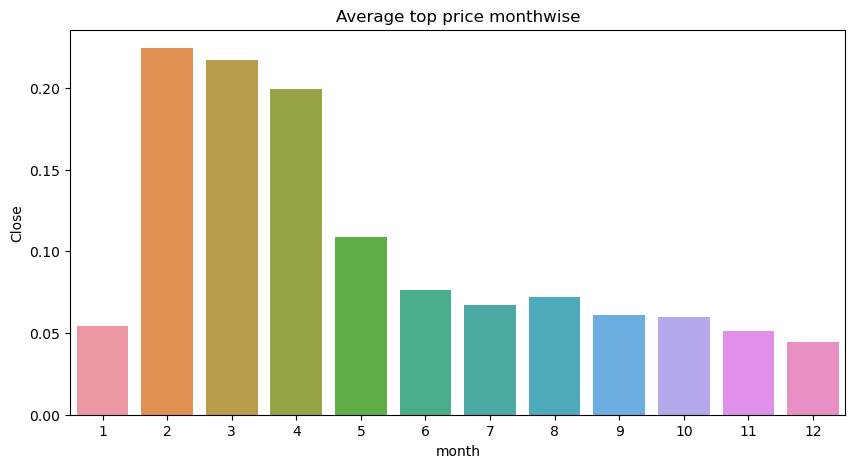

In [28]:
plt.figure(figsize = (22,5))


df_month = pd.DataFrame(df.groupby(['month'])['Close'].mean().sort_values(ascending=False))
df_month = df_month.reset_index()
plt.subplot(1,2,1)
sns.barplot(data=df_month, x = 'month', y='Close')
plt.title('Average top price monthwise')
plt.show()



### ATR of HBAR for last 1 year

In [35]:
start = dt.datetime(2020, 2, 2)
high_low = df['High'] - df['Low']
high_close = np.abs(df['High'] - df['Close'].shift())
low_close = np.abs(df['Low'] - df['Close'].shift())
ranges = pd.concat([high_low, high_close, low_close], axis=1)
true_range = np.max(ranges, axis=1)
atr = true_range.rolling(len(df)).sum()/len(df)
atr.iloc[-1:]  
    
    

365    0.006814
dtype: float64

The ATR of HBAR for last 1 year is 0.0068.

### Conclusion:

- *Price Statistics:*
    - Minimum price for the period of 2nd feb 2022 To 2nd feb 2023 is $ 0.0362.
    
    - Maximum price for the period of 2nd feb 2022 To 2nd feb 2023 is $ 0.0261.
    
    - Average price for the period of 2nd feb 2022 To 2nd feb 2023 is $ 0.0102.
    
- *Price Trends:*
    - Bullish Trend can be seen During March to April.
    - and after April there is bearish trend.
    - From May prices were stagnant untill January 2023.
    - The line is starting to slightly incline during January 2023.
    
- *Checking Seasonality:*
    - The prices are High during February, March and April.